---
layout: code-post
categories: code
---

# Sample Notebook Post

This is a first post that was created from a Jupyter notebook.

Let's load in the iris dataset

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'],
                       iris['target']],
                       columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


If we plot the sepal length and petal length on a scatter plot,
we can see that this should be enough to classify an iris as
either Iris Setosa or not.

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.close_figures=True

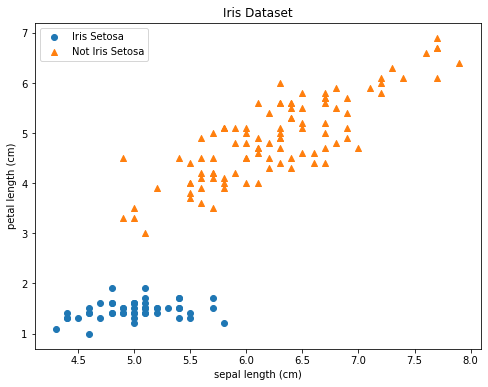

In [13]:
def get_iris_plot():
    """function returning fig and ax for a plot of the iris data
    using sepal length (cm) as the x-variable and petal length (cm)
    as the y-variable"""
    
    fig, ax = plt.subplots(figsize=(6 * 4.0/3, 6))

    df_iris['is_setosa'] = df_iris['target'] == 0

    ax.scatter(df_iris[df_iris['is_setosa']]['sepal length (cm)'],
               df_iris[df_iris['is_setosa']]['petal length (cm)'],
               label='Iris Setosa',
               marker='o')

    ax.scatter(df_iris[~df_iris['is_setosa']]['sepal length (cm)'],
               df_iris[~df_iris['is_setosa']]['petal length (cm)'],
               label='Not Iris Setosa',
               marker='^')

    ax.set_title('Iris Dataset')
    ax.set_xlabel('sepal length (cm)')
    ax.set_ylabel('petal length (cm)')

    ax.legend()

    return fig, ax

fig, ax = get_iris_plot()
plt.show()

This is clearly linearly separable, so let's just use a Linear SVC to classify these points. This is just an example anyway.

In [5]:
from sklearn.svm import LinearSVC

import matplotlib.lines as lines

In [6]:
features = [
    'sepal length (cm)'
    ,'petal length (cm)'
]

clf = LinearSVC()
clf.fit(df_iris[features], df_iris['is_setosa'])
coefs = clf.coef_[0]
intercept = clf.intercept_[0]

And now let's plot the regions that are separated by the support vector classifier.

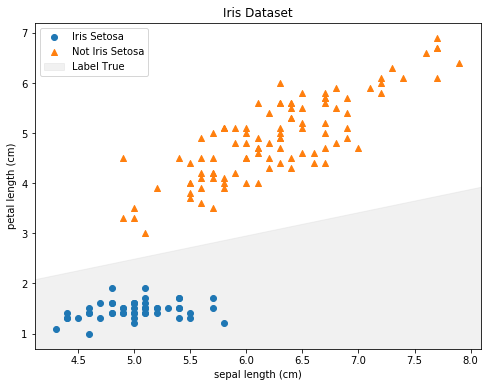

In [14]:
fig, ax = get_iris_plot()

xlim = ax.get_xlim()
ylim = ax.get_ylim()

m = -coefs[0] / coefs[1]
b = -intercept / coefs[1]
points = np.array([
    [xlim[0], xlim[1]]
    ,[m*xlim[0] + b, m*xlim[1] + b]
])

ax.fill_between(points[0], points[1], color='lightgrey', alpha=0.3, zorder=0, label='Label True')
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.legend()
plt.show()